# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

# Оглавление
1. Загрузка данных
2. Умножение матриц
3. Алгоритм преобразования

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin

## Загрузка данных

In [2]:
try:
    data = pd.read_csv('insurance.csv')
except FileNotFoundError:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


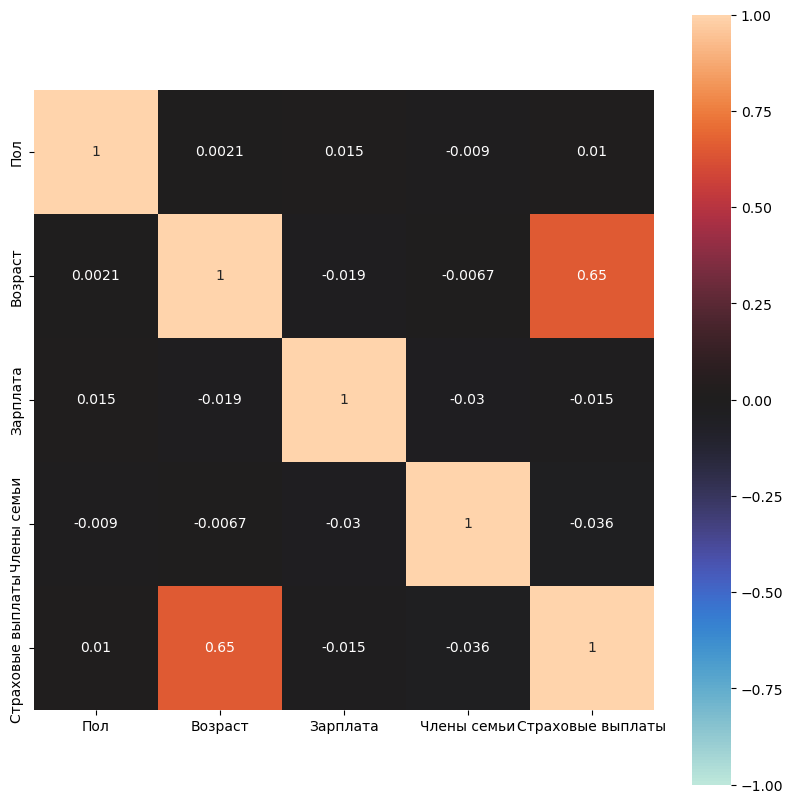

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, square=True, vmin=-1, vmax=1, center=0, ax=ax);

In [7]:
data = data.drop_duplicates()

# Умножение матриц

## Ответьте на вопрос и обоснуйте решение.
Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
- Изменится. Приведите примеры матриц.
- Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Для ответа необходимо доказать (или опровергнуть), что предсказания  𝑎  на исходных признаках будут равны  𝑎2  вычесленному с учетом умножения признаков на заведомо обратимую матрицу

In [8]:
# В рамках задачи считаем, что дополнительная обработка данных нам не нужна
# Разобьем наши данные на признаки и целевой показатель
features = data.drop(columns='Страховые выплаты')
target = data['Страховые выплаты']

In [9]:
features.shape

(4847, 4)

In [10]:
target.shape

(4847,)

Предсказания:

$$\hat{y} = Xw$$

Задача обучения:

$$w = \arg\min_w MSE(Xw, y)$$

Формула обучения:

$$w = (X^T X)^{-1} X^T y$$

**Обозначения:**

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

- $w*$ - вектор весов линейной регрессии матрицы полученной домножение исходной на обратимую матрицу(нулевой элемент равен сдвигу)

- $\hat{y}$ - предсказания по исходной матрице признаков

- $\hat{y}*$ - предсказания по матрице полученной домноженной на обратимую матрицу

**Основные свойства обратной матрицы:**

- $$det(A) = \frac{1}  {det(A)} $$
- $$(AB)^{-1} = B^{-1}A^{-1}$$ для двух квадратных обратимых матриц $A$ и $B$
- $$(A^T)^{-1} = ((A)^{-1})^T$$

**Основные свойства единичной матрицы:**
- $$AE = EA = A$$
- $$AA^{-1}=E$$

**Сочетательное свойство матриц, ассоциативность:**
- $$A(BC) = (AB)C$$

<h4><center>Новая матрица признаков $X.dot(P)$</center></h4>  


Предсказания:

$$
\hat{y}* = XPw*
$$

Формула обучения:

$$
w* = ((XP)^T XP)^{-1} (XP)^T y
$$


Раскроем транспонирование матриц:
$$
w* = (P^T X^T XP)^{-1} P^TX^T y
$$

Вынесем P за скобки по свойству $(AB)^{-1} = B^{-1} A^{-1}$

$$w* = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y$$

Т.к. умножение матрицы на обратимую равно E, можем сократить часть $(P^T)^{-1} P^T$ до $E$ и сразу умножить на $X^T$

$$w* = P^{-1} (X^T X)^{-1} X^T y$$

Вспомним, что $w = (X^T X)^{-1} X^T y$ и произведем замену

$$w* = P^{-1} w$$

Теперь проверим признаки

Запишем формулу

$$\hat{y}* = XPw_2$$

2. Подставим получившиеся значения

$$\hat{y}* = XP P^{-1} w$$

3. Опять же, вспомним, что умножение на обратную матрицу даст $E$

$$\hat{y}* = Xw$$

**4. Учитывая, что $\hat{y} = Xw$, получаем:**

$$\hat{y}* = \hat{y}$$

# Алгоритм преобразования
1. создаём случайную матрицу с помощью np.random.normal
2. пытаемся создать матрицу обратную сгенерированной с помощью np.linalg.inv
3. Если все успешно, то радуемся жизни
     - 3.1. Если создать обратную матрицу не вышло и сработал обработчик ошибок np.linalg.LinAlgError генерируем новую случайную матрицу п.1
4. создаём новую матрицу признаков с помощью функции make_new_features
5. ищем метрики качества как для исходных признаков, так и сгенерированных
6. делаем вывод

In [11]:
# Запрограммируем этот алгоритм, применив матричные операции

def generate_invertible_matrix(size):
    try:
        matrix = np.random.normal(size=(size, size))
        # проверим матрицу на обратимость, если нет, пробуем сгенерировать еще раз
        # таким образом гарантируем, что матрица стопроцентно будет обратимой
        np.linalg.inv(matrix)
    except np.linalg.LinAlgError:
        matrix = generate_invertible_matrix(size)
    
    return matrix

def make_new_features(features):
    size = features.shape[1]
    P = generate_invertible_matrix(size)
    return np.matmul(features,P)
    
new_features = make_new_features(features)

# Проверим, что все ок
features.shape, new_features.shape

((4847, 4), (4847, 4))

In [12]:
model = LinearRegression()

model.fit(features, target)
predict = model.predict(features)

model.fit(new_features, target)
new_predict = model.predict(new_features)

# Сравним R2
print('R2 features = ', r2_score(target, predict))
print('R2 new_features = ', r2_score(target, new_predict))

R2 features =  0.4302010044852067
R2 new_features =  0.4302010044851956


# Вывод

Мы проделали немалую работу:
1. Данные были загружены, проверены и из них были удалены полные дубликаты.
2. Теоретически доказали, что умножение признаков на обратимую матрицу не изменяет качества линейной регресии.
3. Вывели функцию зависимости коэффициентов исходной и домноженной матриц  $w* = P^{-1}w$.
4. Разработали и реализовали алгоритм проверки качества линейной регресси до и после проделанных преобразований над признаками.
5. Убедились, что данные преобразования не влияют на ключевую метрику R2.

Итогом проекта является разрабонная методика преобразования данных, препятствующая восстановлению персональной информации клиентов, но которая не влияет на качество предсказаний линейной регрессии.